#### 训练数据预处理
1. 导入训练数据

In [3769]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

# 这里的编码类型可以用sublime打开查看左下角
base_train = pd.read_csv('tables/base-train.csv',engine='python',encoding='utf8')
knowledge_train = pd.read_csv('tables/knowledge-train.csv',engine='python',encoding='utf8')
money_train = pd.read_csv('tables/money-train.csv',engine='python',encoding='utf8')
year_train = pd.read_csv('tables/year-train.csv',engine='python',encoding='utf8')

    1. base_train表数据处理

In [3770]:
# 1.1 查看具体数据与结构
# 看一下具体数据
base_train.head()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
0,5981446,2008.0,1190.0,服务业,湖南,农民专业合作社,自然人,0.91
1,5993858,2008.0,6670.0,零售业,湖南,集体所有制企业,企业法人,0.91
2,5990025,2008.0,9100.0,社区服务,湖北,农民专业合作社,NaN,0.51
3,5982670,2002.0,5870.0,商业服务业,广东,股份有限公司,企业法人,0.63
4,5990751,2005.0,9850.0,工业,江西,集体所有制企业,企业法人,0.58


In [3771]:
# 表的结构
base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       17319 non-null  int64  
 1   注册时间     17131 non-null  float64
 2   注册资本     17140 non-null  float64
 3   行业       17157 non-null  object 
 4   区域       17156 non-null  object 
 5   企业类型     17141 non-null  object 
 6   控制人类型    17131 non-null  object 
 7   控制人持股比例  17135 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


    1.2 分析数值特征，处理缺失数据
        1.2.1 注册时间
        1.2.2 注册资本
        1.2.3 控制人持股比例
        1.2.4 处理行业缺失值。区域、企业类型、控制人类型都可以同样处理，都替换为未知
        1.2.5 删掉几个不重要的列

In [3772]:
# 1.2.1 注册时间
# 注册时间有缺失，有188行缺失，占比比较小
base_train.loc[base_train['注册时间'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
109,5993383,NaN,4340.0,交通运输业,湖北,农民专业合作社,自然人,0.93
213,5989086,NaN,6060.0,工业,广西,农民专业合作社,自然人,1.00
217,5996523,NaN,8190.0,工业,湖南,集体所有制企业,自然人,0.93
239,5999826,NaN,1820.0,商业服务业,广东,合伙企业,企业法人,0.67
297,5993823,NaN,5780.0,交通运输业,湖北,股份有限公司,企业法人,0.87
...,...,...,...,...,...,...,...,...
16837,5978130,NaN,3490.0,社区服务,湖北,集体所有制企业,企业法人,0.95
17019,5993982,NaN,6870.0,交通运输业,湖北,集体所有制企业,自然人,0.69
17168,5999241,NaN,1110.0,交通运输业,福建,有限责任公司,企业法人,NaN
17292,5996101,NaN,900.0,工业,广西,有限责任公司,自然人,0.58


In [3773]:
# 删除这些行即可
base_train.dropna(subset=['注册时间'],inplace=True)

In [3774]:
# 虽然有缺失，但是不能直接删除这个列，而是计算一下公司的营业年份，用2017减去。首先要删除注册时间有缺失的行
注册时间 = base_train['注册时间'].apply(lambda x:2017-x)
base_train['注册时间']=注册时间

In [3775]:
# 1.2.2 注册资本

base_train.loc[base_train['注册资本'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
37,5989642,8.0,NaN,服务业,湖南,农民专业合作社,自然人,0.73
176,5997860,6.0,NaN,零售业,湖南,合伙企业,自然人,0.81
208,5982495,9.0,NaN,服务业,山东,合伙企业,自然人,0.91
289,5993575,11.0,NaN,交通运输业,福建,股份有限公司,企业法人,1.00
487,5984532,11.0,NaN,零售业,湖南,有限责任公司,企业法人,0.54
...,...,...,...,...,...,...,...,...
16403,5982345,8.0,NaN,零售业,湖北,集体所有制企业,自然人,0.78
16704,5992211,10.0,NaN,服务业,江西,合伙企业,自然人,0.69
16832,5990603,17.0,NaN,社区服务,广东,合伙企业,自然人,0.60
16857,5997241,5.0,NaN,社区服务,广西,农民专业合作社,自然人,0.81


c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='注册资本', ylabel='Density'>

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs

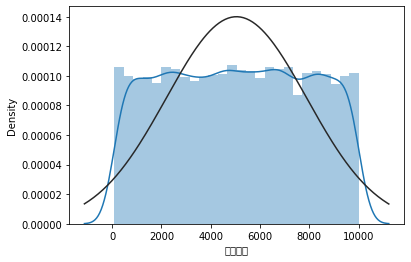

In [3776]:
# 注册资本的分布
sns.distplot(base_train['注册资本'],fit=st.norm)

In [3777]:
# 直接平均值填充
mean = base_train['注册资本'].mean()
base_train['注册资本'].fillna(mean,inplace=True)

In [3778]:
# 1.2.3 控制人持股比例
base_train.loc[base_train['控制人持股比例'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
83,5980200,5.0,3680.0,工业,湖北,股份有限公司,企业法人,NaN
162,5995639,10.0,3200.0,商业服务业,江西,有限责任公司,企业法人,NaN
222,5981602,14.0,6340.0,交通运输业,广东,股份有限公司,自然人,NaN
313,5992751,10.0,8590.0,零售业,江西,集体所有制企业,自然人,NaN
654,5986333,4.0,2740.0,社区服务,广东,农民专业合作社,自然人,NaN
...,...,...,...,...,...,...,...,...
17086,5999113,12.0,6750.0,交通运输业,江西,合伙企业,自然人,NaN
17087,5985814,7.0,9550.0,服务业,福建,合伙企业,企业法人,NaN
17121,5992406,7.0,4660.0,社区服务,广东,集体所有制企业,企业法人,NaN
17176,5990086,11.0,1670.0,交通运输业,湖北,农民专业合作社,企业法人,NaN


c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='控制人持股比例', ylabel='Density'>

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\en

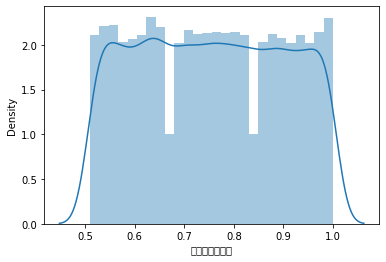

In [3779]:
sns.distplot(base_train['控制人持股比例'])

In [3780]:
# 将缺失值替换为平均值
base_train['控制人持股比例'].fillna(base_train['控制人持股比例'].mean(),inplace=True)


In [3781]:
# 1.2.4 处理行业缺失值。区域、企业类型、控制人类型都可以同样处理，都替换为未知
base_train.loc[base_train['行业'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
64,5986805,9.0,3650.0,NaN,江西,有限责任公司,企业法人,0.97
144,5979440,3.0,9100.0,NaN,广西,农民专业合作社,自然人,0.60
178,5998009,7.0,3790.0,NaN,湖北,有限责任公司,自然人,0.99
263,5992711,13.0,7850.0,NaN,广西,合伙企业,自然人,0.62
276,5981449,8.0,4280.0,NaN,山东,集体所有制企业,企业法人,0.80
...,...,...,...,...,...,...,...,...
16618,5996410,10.0,3360.0,NaN,江西,农民专业合作社,企业法人,0.57
16640,5982386,12.0,7390.0,NaN,湖南,合伙企业,企业法人,0.51
17108,5985593,16.0,5250.0,NaN,山东,合伙企业,自然人,0.99
17187,5980452,5.0,9610.0,NaN,福建,集体所有制企业,企业法人,0.52


In [3782]:
base_train['行业'].fillna('未知',inplace=True)

In [3783]:
# 其他缺失值也这样处理
base_train['区域'].fillna('未知',inplace=True)

In [3784]:
base_train['企业类型'].fillna('未知',inplace=True)

In [3785]:
base_train['控制人类型'].fillna('未知',inplace=True)

In [3786]:
base_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17131 entries, 0 to 17318
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       17131 non-null  int64  
 1   注册时间     17131 non-null  float64
 2   注册资本     17131 non-null  float64
 3   行业       17131 non-null  object 
 4   区域       17131 non-null  object 
 5   企业类型     17131 non-null  object 
 6   控制人类型    17131 non-null  object 
 7   控制人持股比例  17131 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [3787]:
# 1.2.5 删掉几个不重要的列

base_train.rename({'注册时间':'营业时长'},inplace=True)

In [3788]:
base_train.drop(columns=['行业','区域','企业类型','控制人类型'],inplace=True)

In [3789]:
base_train

,ID,注册时间,注册资本,控制人持股比例
0,5981446,9.0,1190.0,0.91
1,5993858,9.0,6670.0,0.91
2,5990025,9.0,9100.0,0.51
3,5982670,15.0,5870.0,0.63
4,5990751,12.0,9850.0,0.58
...,...,...,...,...
17314,5998408,17.0,490.0,0.51
17315,5998088,5.0,1490.0,0.73
17316,5985946,8.0,3550.0,0.58
17317,5990954,10.0,6770.0,0.96


2. knowledge_train表数据处理

    2.1 三列都合并为知识产权统计一列，看作评价的权重
    2.2 合并到base_train表中


In [3790]:
knowledge_train.head()

,ID,专利,商标,著作权
0,5978034,0.0,1.0,1.0
1,5978036,0.0,0.0,1.0
2,5978037,1.0,1.0,1.0
3,5978038,0.0,0.0,0.0
4,5978039,0.0,0.0,0.0


In [3791]:
knowledge_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      17319 non-null  int64  
 1   专利      17142 non-null  float64
 2   商标      17143 non-null  float64
 3   著作权     17136 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 541.3 KB


In [3792]:
# 缺失值全用0填充
knowledge_train.fillna(0,inplace=True)

In [3793]:
知识产权 = knowledge_train[knowledge_train.columns[1:4]].sum(1)
knowledge_train.drop(columns=['专利','商标', '著作权'],inplace=True)

In [3794]:
knowledge_train = pd.concat([knowledge_train,知识产权],axis=1)

In [3795]:
# 连接之后没有列名
knowledge_train

,ID,0
0,5978034,2.0
1,5978036,1.0
2,5978037,3.0
3,5978038,0.0
4,5978039,0.0
...,...,...
17314,5999995,2.0
17315,5999997,2.0
17316,5999998,0.0
17317,5999999,3.0


In [3796]:
knowledge_train.rename(columns={0:'知识产权'},inplace=True)
knowledge_train

,ID,知识产权
0,5978034,2.0
1,5978036,1.0
2,5978037,3.0
3,5978038,0.0
4,5978039,0.0
...,...,...
17314,5999995,2.0
17315,5999997,2.0
17316,5999998,0.0
17317,5999999,3.0


In [3797]:
# 最后合并一下
base_train = base_train.merge(knowledge_train,on='ID',how='left')

In [3798]:
base_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17131 entries, 0 to 17130
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       17131 non-null  int64  
 1   注册时间     17131 non-null  float64
 2   注册资本     17131 non-null  float64
 3   控制人持股比例  17131 non-null  float64
 4   知识产权     17131 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 803.0 KB


3. money_train表数据处理

    3.1 查看数据与结构

    3.2 缺失值处理（直接删除该行）

    3.3 特征融合

    3.4 处理3年财报信息

    3.5 合并到base_train中

In [3799]:
# 3.1 查看数据与结构
money_train.head()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,5978034,2015.0,0.0,0.0,0.0,0.000,54432.0,3265.92,0.0,0.000
1,5978036,2015.0,0.0,0.0,14328.0,573.120,0.0,0.00,0.0,0.000
2,5978037,2015.0,0.0,0.0,0.0,0.000,0.0,0.00,790.8,47.448
3,5978038,2015.0,10170.0,813.6,0.0,0.000,0.0,0.00,0.0,0.000
4,5978039,2015.0,0.0,0.0,30844.8,1233.792,0.0,0.00,0.0,NaN


In [3800]:
money_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51954 entries, 0 to 51953
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           51954 non-null  int64  
 1   year         51429 non-null  float64
 2   债权融资额度       51474 non-null  float64
 3   债权融资成本       51433 non-null  float64
 4   股权融资额度       51429 non-null  float64
 5   股权融资成本       51424 non-null  float64
 6   内部融资和贸易融资额度  51473 non-null  float64
 7   内部融资和贸易融资成本  51452 non-null  float64
 8   项目融资和政策融资额度  51415 non-null  float64
 9   项目融资和政策融资成本  51428 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 4.0 MB


In [3801]:
# 3.2 有缺失值的直接删除该行即可
money_train.dropna(how='any',inplace=True)

In [3802]:
money_train

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,5978034,2015.0,0.0,0.00,0.0,0.00,54432.0,3265.92,0.0,0.000
1,5978036,2015.0,0.0,0.00,14328.0,573.12,0.0,0.00,0.0,0.000
2,5978037,2015.0,0.0,0.00,0.0,0.00,0.0,0.00,790.8,47.448
3,5978038,2015.0,10170.0,813.60,0.0,0.00,0.0,0.00,0.0,0.000
5,5978040,2015.0,0.0,0.00,2292.0,91.68,0.0,0.00,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
51948,5999993,2017.0,0.0,0.00,0.0,0.00,0.0,0.00,1806.0,108.360
51950,5999995,2017.0,82025.0,6562.00,0.0,0.00,0.0,0.00,0.0,0.000
51951,5999997,2017.0,14448.0,1155.84,0.0,0.00,0.0,0.00,0.0,0.000
51952,5999998,2017.0,0.0,0.00,0.0,0.00,18265.5,1095.93,0.0,0.000


In [3803]:
# 3.3 特征融合
融资额度 = money_train[['债权融资额度','股权融资额度','内部融资和贸易融资额度','项目融资和政策融资额度']].sum(1)
融资成本 = money_train[['债权融资成本','股权融资成本','内部融资和贸易融资成本','项目融资和政策融资成本']].sum(1)

In [3804]:
# 将融资情况汇总
融资情况=融资额度-融资成本
融资情况=pd.DataFrame({'融资情况':融资情况})
money_train = pd.concat([money_train,融资情况],axis=1)

In [3805]:
# 只需要保留融和后的信息即可
money_train.drop(columns=['债权融资额度','股权融资额度','内部融资和贸易融资额度','项目融资和政策融资额度','债权融资成本','股权融资成本','内部融资和贸易融资成本','项目融资和政策融资成本'],
                 inplace=True)

In [3806]:
# 3.4 处理15年财报信息
# 取出信息
money_2015 = money_train.iloc[(money_train['year']==2015).values]
# 改名
money_2015.rename(columns={
    '融资情况':'融资情况_2015'
},inplace=True)
# 年份列不再需要
money_2015.drop(columns=['year'],inplace=True)
money_2015.head()
money_2016 = money_train.iloc[(money_train['year']==2016).values]
money_2016.rename(columns={
    '融资情况':'融资情况_2016'
},inplace=True)
money_2016.drop(columns=['year'],inplace=True)
# money_2017 = money_train.iloc[(money_train['year']==2017).values]
# money_2017.rename(columns={
#     '融资情况':'融资情况_2017'
# },inplace=True)
# money_2017.drop(columns=['year'],inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=

In [3807]:
# 3.5 合并到base_train表中
base_train = base_train.merge(money_2015,on='ID',how='left')
base_train = base_train.merge(money_2016,on='ID',how='left')
# base_train = base_train.merge(money_2017,on='ID',how='left')
# 居然有4033行都有缺失数据，也就是可能有些公司的某一年融资情况为空
base_train.loc[base_train.isna().any(1)]

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016
6,5986954,10.0,3320.0,0.86,2.0,1631.8464,NaN
7,5989011,11.0,6680.0,0.65,0.0,NaN,30728.000
8,5996878,3.0,9390.0,0.59,3.0,NaN,5949.504
9,5984181,13.0,2290.0,0.96,1.0,8125.2864,NaN
21,5991744,6.0,7640.0,0.75,0.0,8617.9200,NaN
...,...,...,...,...,...,...,...
17096,5997687,8.0,7160.0,0.66,2.0,NaN,23055.200
17106,5990027,13.0,4580.0,0.81,0.0,13904.8800,NaN
17109,5982310,6.0,4220.0,0.98,2.0,NaN,109483.680
17118,5992584,7.0,5160.0,0.73,0.0,727.5600,NaN


In [3808]:
# 直接用0填充
base_train.fillna(0,inplace=True)

In [3809]:
base_train.loc[base_train.isna().any(1)]

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016


4 year_train表数据处理

In [3810]:
year_train.head()

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
0,5978034,2015.0,868.0,67200.0,61600.0,181440.0,127008.0,18144.0,72576.0,36288.0,5600.0
1,5978036,2015.0,556.0,71640.0,127360.0,358200.0,179100.0,71640.0,143280.0,143280.0,-55720.0
2,5978037,2015.0,426.0,19770.0,13180.0,39540.0,15816.0,19770.0,7908.0,23724.0,6590.0
3,5978038,2015.0,815.0,101700.0,96050.0,203400.0,81360.0,20340.0,0.0,40680.0,5650.0
4,5978039,2015.0,450.0,107100.0,202300.0,385560.0,308448.0,154224.0,38556.0,231336.0,-95200.0


2015年

In [3811]:
year_2015 = year_train.iloc[(year_train['year']==2015).values]

In [3812]:
year_2015.rename(columns={
    '从业人数':'从业人数_2015',
    '资产总额':'资产总额_2015',
    '负债总额':'负债总额_2015',
    '主营业务收入':'主营业务收入_2015',
    '净利润':'净利润_2015',
    '所有者权益合计':'所有者权益合计_2015'
},inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3813]:
year_2015.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3814]:
year_2015.head()

,ID,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,净利润_2015,所有者权益合计_2015
0,5978034,868.0,67200.0,61600.0,127008.0,72576.0,5600.0
1,5978036,556.0,71640.0,127360.0,179100.0,143280.0,-55720.0
2,5978037,426.0,19770.0,13180.0,15816.0,7908.0,6590.0
3,5978038,815.0,101700.0,96050.0,81360.0,0.0,5650.0
4,5978039,450.0,107100.0,202300.0,308448.0,38556.0,-95200.0


2016年

In [3815]:
year_2016 = year_train.iloc[(year_train['year']==2016).values]

In [3816]:
year_2016.rename(columns={
    '从业人数':'从业人数_2016',
    '资产总额':'资产总额_2016',
    '负债总额':'负债总额_2016',
    '主营业务收入':'主营业务收入_2016',
    '净利润':'净利润_2016',
    '所有者权益合计':'所有者权益合计_2016'
},inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3817]:
year_2016.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3818]:
year_2016.head()

,ID,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,净利润_2016,所有者权益合计_2016
17318,5978034,841.0,39200.0,50400.0,61152.0,15288.0,-11200.0
17319,5978036,65.0,31840.0,35820.0,25472.0,0.0,NaN
17320,5978037,84.0,79080.0,144980.0,142344.0,71172.0,-65900.0
17321,5978038,546.0,56500.0,25425.0,159330.0,106220.0,31075.0
17322,5978039,960.0,41650.0,35700.0,109956.0,NaN,5950.0


2017年

In [3819]:
# year_2017 = year_train.iloc[(year_train['year']==2017).values]

In [3820]:
# year_2017.rename(columns={
#     '从业人数':'从业人数_2017',
#     '资产总额':'资产总额_2017',
#     '负债总额':'负债总额_2017',
#     '主营业务收入':'主营业务收入_2017',
#     '净利润':'净利润_2017',
#     '所有者权益合计':'所有者权益合计_2017'
# },inplace=True)
#

In [3821]:
# year_2017.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)
#

In [3822]:
# year_2017.head()

In [3823]:
base_train = base_train.merge(year_2015,on='ID',how='left')

In [3824]:
base_train = base_train.merge(year_2016,on='ID',how='left')

In [3825]:
# base_train = base_train.merge(year_2017,on='ID',how='left')

In [3826]:
base_train.loc[base_train.isna().any(1)]

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,净利润_2015,所有者权益合计_2015,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,净利润_2016,所有者权益合计_2016
16,5983116,9.0,2200.0,1.00,3.0,81644.6400,12976.128,692.0,61600.0,59400.0,NaN,115808.0,2200.0,119.0,70400.0,102300.0,180224.0,0.0,-31900.0
18,5995404,13.0,6710.0,0.60,1.0,566.8608,1513.776,249.0,73810.0,67100.0,8857.2,4428.6,NaN,269.0,80520.0,36905.0,56364.0,-11272.8,43615.0
21,5991744,6.0,7640.0,0.75,0.0,8617.9200,0.000,111.0,152800.0,145160.0,15280.0,NaN,7640.0,266.0,191000.0,366720.0,267400.0,200550.0,-175720.0
24,5994109,14.0,4340.0,0.73,1.0,0.0000,21665.280,746.0,52080.0,23870.0,60412.8,45309.6,28210.0,669.0,NaN,26040.0,90272.0,90272.0,30380.0
27,5990416,9.0,2560.0,0.86,2.0,75801.6000,1884.160,233.0,53760.0,102400.0,NaN,-26880.0,-48640.0,776.0,20480.0,35840.0,31948.8,10649.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,5982310,6.0,4220.0,0.98,2.0,0.0000,109483.680,192.0,67520.0,63300.0,81024.0,0.0,4220.0,NaN,NaN,NaN,NaN,NaN,NaN
17110,5983295,3.0,2300.0,0.57,3.0,846.4000,3761.880,621.0,9200.0,10350.0,25024.0,-3128.0,-1150.0,718.0,4600.0,NaN,9338.0,2668.0,1150.0
17125,5992487,15.0,5240.0,0.82,3.0,2561.3120,689.584,288.0,68120.0,125760.0,38147.2,28610.4,-57640.0,252.0,73360.0,136240.0,236219.2,NaN,-62880.0
17126,5998408,17.0,490.0,0.51,0.0,414.5400,0.000,NaN,14700.0,7105.0,735.0,0.0,7595.0,724.0,23520.0,46060.0,56448.0,33868.8,-22540.0


In [3827]:
base_train = base_train.dropna(axis=0,how='any')

In [3828]:
base_train.head()

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,净利润_2015,所有者权益合计_2015,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,净利润_2016,所有者权益合计_2016
0,5981446,9.0,1190.0,0.91,1.0,3065.440,4379.200,74.0,33320.0,64260.0,102625.6,-14660.8,-30940.0,631.0,47600.0,69615.0,20944.0,-5236.0,-22015.0
1,5993858,9.0,6670.0,0.91,0.0,1755.544,21066.528,21.0,186760.0,90045.0,134467.2,16808.4,96715.0,353.0,106720.0,150075.0,37352.0,-7470.4,-43355.0
2,5990025,9.0,9100.0,0.51,2.0,5987.800,5474.560,985.0,127400.0,236600.0,50960.0,50960.0,-109200.0,84.0,291200.0,282100.0,87360.0,43680.0,9100.0
3,5982670,15.0,5870.0,0.63,2.0,3586.570,22089.984,808.0,76310.0,105660.0,86993.4,57995.6,-29350.0,965.0,410900.0,607545.0,920416.0,230104.0,-196645.0
4,5990751,12.0,9850.0,0.58,0.0,4629.500,12221.880,112.0,98500.0,177300.0,124110.0,41370.0,-78800.0,213.0,325050.0,472800.0,682605.0,341302.5,-147750.0


设计训练数据
将year_train中的17年净利润根据ID取出，与base_train表相连接

In [3829]:
year_2017 = year_train.iloc[(year_train['year']==2017).values]
year_2017.info()
year_2017.rename(columns={
    '净利润':'净利润_2017'
},inplace=True)
year_2017.drop(columns=['year','从业人数','资产总额','负债总额','所有者权益合计','主营业务收入','纳税总额','利润总额','营业总收入'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17148 entries, 34636 to 51953
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       17148 non-null  int64  
 1   year     17148 non-null  float64
 2   从业人数     16989 non-null  float64
 3   资产总额     16985 non-null  float64
 4   负债总额     16988 non-null  float64
 5   营业总收入    16982 non-null  float64
 6   主营业务收入   16970 non-null  float64
 7   利润总额     16979 non-null  float64
 8   净利润      16965 non-null  float64
 9   纳税总额     16966 non-null  float64
 10  所有者权益合计  16991 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3830]:
# 与base_train连接起来
base_train = base_train.merge(year_2017,on='ID',how='left')

In [3831]:
# 去除ID列，数值过大，影响训练
X = base_train[base_train.columns[1:len(base_train)]]

np.isnan(X).any()



注册时间            False
注册资本            False
控制人持股比例         False
知识产权            False
融资情况_2015       False
融资情况_2016       False
从业人数_2015       False
资产总额_2015       False
负债总额_2015       False
主营业务收入_2015     False
净利润_2015        False
所有者权益合计_2015    False
从业人数_2016       False
资产总额_2016       False
负债总额_2016       False
主营业务收入_2016     False
净利润_2016        False
所有者权益合计_2016    False
净利润_2017         True
dtype: bool

In [3832]:
# 归一化
X = X.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [3833]:
y_true = X['净利润_2017']
# 存在na值，用0填充
y_true.fillna(0,inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='净利润_2017', ylabel='Density'>

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20928 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\p

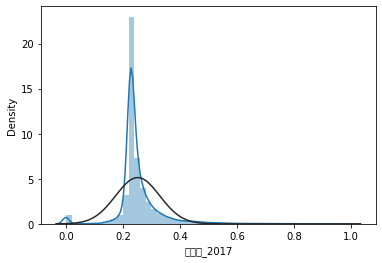

In [3834]:
sns.distplot(y_true,fit=st.norm)

In [3835]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14894 entries, 0 to 14893
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   注册时间          14894 non-null  float64
 1   注册资本          14894 non-null  float64
 2   控制人持股比例       14894 non-null  float64
 3   知识产权          14894 non-null  float64
 4   融资情况_2015     14894 non-null  float64
 5   融资情况_2016     14894 non-null  float64
 6   从业人数_2015     14894 non-null  float64
 7   资产总额_2015     14894 non-null  float64
 8   负债总额_2015     14894 non-null  float64
 9   主营业务收入_2015   14894 non-null  float64
 10  净利润_2015      14894 non-null  float64
 11  所有者权益合计_2015  14894 non-null  float64
 12  从业人数_2016     14894 non-null  float64
 13  资产总额_2016     14894 non-null  float64
 14  负债总额_2016     14894 non-null  float64
 15  主营业务收入_2016   14894 non-null  float64
 16  净利润_2016      14894 non-null  float64
 17  所有者权益合计_2016  14894 non-null  float64
 18  净利润_2017      14894 non-nu

In [3836]:
X.drop(columns=['净利润_2017'],inplace=True)

In [3837]:
# 数据切分 查看训练集上的准确度
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_true,test_size=0.4)


#### 随机森林 决策树
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error

# clf = tree.DecisionTreeRegressor(max_depth=3,min_samples_split=3,min_samples_leaf=1)
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
# clf.score(X_test,y_test)
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.005701238787880382

In [3838]:
# 最终的训练数据
# train_data.to_csv('tables/train.csv')

接下来对测试数据进行预测

    1. 数据预处理

    1.1 导入数据表

    1.2 对数据表进行处理
        1.2.1 base_test表处理
        1.2.2 knowledge_test表处理
        1.2.3 money_test表处理
        1.2.4 year_test表处理
    1.3 整理预测数据

In [3839]:
# 1.1 导入数据
base_test = pd.read_csv('tables/base-test.csv',engine='python',encoding='utf8')
knowledge_test = pd.read_csv('tables/knowledge-test.csv',engine='python',encoding='utf8')
money_test = pd.read_csv('tables/money-test.csv',engine='python',encoding='gb2312')
year_test = pd.read_csv('tables/year-test.csv',engine='python',encoding='gb2312')

In [3840]:
# 1.2.1 对base_test表进行处理
base_test

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
0,5992473,2010.0,8670.0,交通运输业,广东,有限责任公司,企业法人,0.54
1,5999375,2010.0,3400.0,服务业,广东,集体所有制企业,企业法人,0.90
2,5981121,2014.0,3350.0,商业服务业,福建,有限责任公司,企业法人,0.51
3,5978928,2012.0,7690.0,工业,广西,股份有限公司,企业法人,0.81
4,5979981,2013.0,4850.0,交通运输业,广西,股份有限公司,企业法人,0.61
...,...,...,...,...,...,...,...,...
4063,5984213,2000.0,3740.0,社区服务,江西,农民专业合作社,自然人,0.73
4064,5983087,2000.0,8550.0,服务业,广西,农民专业合作社,自然人,0.58
4065,5991518,2013.0,100.0,商业服务业,江西,有限责任公司,自然人,0.87
4066,5997731,2000.0,7320.0,社区服务,湖北,股份有限公司,企业法人,0.61


In [3841]:
# 1.2.1.1 注册时间
# 注册时间有缺失，有188行缺失，占比比较小
base_test.loc[base_test['注册时间'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
109,5979602,NaN,4020.0,交通运输业,江西,集体所有制企业,企业法人,0.80
157,5987719,NaN,430.0,服务业,湖北,合伙企业,企业法人,0.79
296,5998824,NaN,9900.0,零售业,湖南,股份有限公司,企业法人,0.65
391,5982655,NaN,1500.0,交通运输业,江西,股份有限公司,自然人,0.76
572,5992109,NaN,2890.0,服务业,湖北,有限责任公司,企业法人,0.80
869,5989756,NaN,6850.0,零售业,广西,合伙企业,企业法人,0.92
882,5988229,NaN,3430.0,工业,湖北,股份有限公司,自然人,0.64
929,5998490,NaN,8700.0,工业,福建,有限责任公司,企业法人,0.63
991,5979014,NaN,1090.0,工业,广东,农民专业合作社,自然人,0.60
1002,5986767,NaN,4090.0,社区服务,广东,集体所有制企业,企业法人,0.92


In [3842]:
# 使用均值来填充
base_test['注册时间'].fillna(base_test['注册时间'].mean(),inplace=True)

In [3843]:
base_test.loc[base_test['注册时间'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例


In [3844]:
# 计算一下公司的营业年份，用2017减去。前提要先删除注册时间有缺失的行
base_test['注册时间'] = base_test['注册时间'].apply(lambda x:2017-x)

base_test.rename({'注册时间':'营业时长'},inplace=True)

In [3845]:
# 1.2.1.2 注册资本
base_test.loc[base_test['注册资本'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
60,5989707,16.0,NaN,商业服务业,广东,有限责任公司,企业法人,0.75
275,5985277,6.0,NaN,商业服务业,湖南,集体所有制企业,自然人,0.60
313,5996756,5.0,NaN,服务业,江西,合伙企业,自然人,NaN
407,5984465,12.0,NaN,工业,江西,有限责任公司,自然人,0.97
453,5996594,16.0,NaN,商业服务业,湖北,集体所有制企业,自然人,0.79
559,5986197,7.0,NaN,零售业,广东,农民专业合作社,自然人,0.54
598,5991421,7.0,NaN,零售业,山东,农民专业合作社,自然人,0.99
615,5985299,4.0,NaN,交通运输业,广东,农民专业合作社,企业法人,0.92
667,5980117,13.0,NaN,交通运输业,山东,股份有限公司,自然人,1.00
699,5978344,15.0,NaN,交通运输业,广东,合伙企业,自然人,0.51


In [3846]:
# 直接平均值填充
mean = base_test['注册资本'].mean()
base_test['注册资本'].fillna(mean,inplace=True)

In [3847]:
# 1.2.1.3 控制人持股比例
base_test.loc[base_test['控制人持股比例'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
37,5989962,16.0,5500.000000,交通运输业,山东,股份有限公司,企业法人,NaN
153,5989810,6.0,3400.000000,工业,江西,股份有限公司,企业法人,NaN
181,5992933,12.0,3860.000000,服务业,广东,合伙企业,企业法人,NaN
207,5993113,4.0,5460.000000,零售业,湖南,有限责任公司,企业法人,NaN
245,5983486,3.0,1540.000000,NaN,广东,有限责任公司,自然人,NaN
313,5996756,5.0,5018.526786,服务业,江西,合伙企业,自然人,NaN
354,5986110,8.0,3570.000000,服务业,广西,股份有限公司,企业法人,NaN
674,5982521,13.0,7510.000000,服务业,福建,集体所有制企业,自然人,NaN
677,5982575,10.0,9270.000000,交通运输业,湖南,有限责任公司,自然人,NaN
679,5997220,8.0,4060.000000,服务业,广西,集体所有制企业,企业法人,NaN


In [3848]:
# 将缺失值替换为平均值
base_test['控制人持股比例'].fillna(base_test['控制人持股比例'].mean(),inplace=True)

In [3849]:
# 1.2.1.4 处理行业缺失值。区域、企业类型、控制人类型都可以同样处理，都替换为未知
base_test.loc[base_test['行业'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例
245,5983486,3.0,1540.0,NaN,广东,有限责任公司,自然人,0.756501
247,5983297,9.0,4850.0,NaN,江西,股份有限公司,企业法人,0.730000
553,5982111,16.0,2530.0,NaN,福建,农民专业合作社,自然人,0.900000
756,5978297,10.0,9670.0,NaN,广东,合伙企业,自然人,0.780000
760,5995041,15.0,4510.0,NaN,江西,有限责任公司,自然人,0.670000
781,5998065,4.0,4450.0,NaN,山东,合伙企业,自然人,0.990000
841,5984247,6.0,5950.0,NaN,湖北,股份有限公司,自然人,0.760000
1020,5982251,13.0,1790.0,NaN,广东,农民专业合作社,企业法人,0.510000
1207,5988817,12.0,2420.0,NaN,江西,农民专业合作社,自然人,0.920000
1227,5979797,6.0,3400.0,NaN,山东,农民专业合作社,自然人,0.850000


In [3850]:
base_test['行业'].fillna('未知',inplace=True)

In [3851]:
# 其他缺失值也这样处理
base_test['区域'].fillna('未知',inplace=True)

In [3852]:
base_test['企业类型'].fillna('未知',inplace=True)

In [3853]:
base_test['控制人类型'].fillna('未知',inplace=True)

In [3854]:
# 1.2.1.5 删掉几个不重要的列

base_test.drop(columns=['行业','区域','企业类型','控制人类型'],inplace=True)

In [3855]:
base_test

,ID,注册时间,注册资本,控制人持股比例
0,5992473,7.0,8670.0,0.54
1,5999375,7.0,3400.0,0.90
2,5981121,3.0,3350.0,0.51
3,5978928,5.0,7690.0,0.81
4,5979981,4.0,4850.0,0.61
...,...,...,...,...
4063,5984213,17.0,3740.0,0.73
4064,5983087,17.0,8550.0,0.58
4065,5991518,4.0,100.0,0.87
4066,5997731,17.0,7320.0,0.61


2. knowledge_train表数据处理

    2.1 三列都合并为知识产权统计一列，看作评价的权重
    2.2 合并到base_train表中

In [3856]:
knowledge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4068 non-null   int64  
 1   专利      4031 non-null   float64
 2   商标      4024 non-null   float64
 3   著作权     4033 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 127.2 KB


In [3857]:
# 缺失值全用0填充
knowledge_test.fillna(0,inplace=True)

In [3858]:
知识产权 = knowledge_test[knowledge_test.columns[1:4]].sum(1)
knowledge_test.drop(columns=['专利','商标', '著作权'],inplace=True)

In [3859]:
knowledge_test = pd.concat([knowledge_test,知识产权],axis=1)

In [3860]:
knowledge_test.rename(columns={0:'知识产权'},inplace=True)

In [3861]:
# 最后合并一下
base_test = base_test.merge(knowledge_test,on='ID',how='left')

In [3862]:
base_test


,ID,注册时间,注册资本,控制人持股比例,知识产权
0,5992473,7.0,8670.0,0.54,3.0
1,5999375,7.0,3400.0,0.90,2.0
2,5981121,3.0,3350.0,0.51,2.0
3,5978928,5.0,7690.0,0.81,0.0
4,5979981,4.0,4850.0,0.61,2.0
...,...,...,...,...,...
4063,5984213,17.0,3740.0,0.73,0.0
4064,5983087,17.0,8550.0,0.58,2.0
4065,5991518,4.0,100.0,0.87,0.0
4066,5997731,17.0,7320.0,0.61,2.0


In [3863]:
# 3.2 有缺失值的直接删除该行即可
money_test.dropna(how='any',inplace=True)

In [3864]:
# 3.3 特征融合
融资额度2 = money_test[['债权融资额度','股权融资额度','内部融资和贸易融资额度','项目融资和政策融资额度']].sum(1)
融资成本2 = money_test[['债权融资成本','股权融资成本','内部融资和贸易融资成本','项目融资和政策融资成本']].sum(1)

In [3865]:
# 将融资情况汇总
融资情况2=融资额度2-融资成本2
融资情况2=pd.DataFrame({'融资情况':融资情况2})
money_test = pd.concat([money_test,融资情况2],axis=1)

In [3866]:
# 只需要保留融和后的信息即可
money_test.drop(columns=['债权融资额度','股权融资额度','内部融资和贸易融资额度','项目融资和政策融资额度','债权融资成本','股权融资成本','内部融资和贸易融资成本','项目融资和政策融资成本'],
                 inplace=True)

In [3867]:
# 3.4 处理1516年财报信息
# 取出信息
money_test_2015 = money_test.iloc[(money_test['year']==2015).values]
# 改名
money_test_2015.rename(columns={
    '融资情况':'融资情况_2015'
},inplace=True)
# 年份列不再需要
money_test_2015.drop(columns=['year'],inplace=True)
money_test_2015.head()
money_test_2016 = money_test.iloc[(money_test['year']==2016).values]
money_test_2016.rename(columns={
    '融资情况':'融资情况_2016'
},inplace=True)
money_test_2016.drop(columns=['year'],inplace=True)
# 无17年数据

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=

In [3868]:
# 3.5 合并到base_test表中
base_test = base_test.merge(money_test_2015,on='ID',how='left')

In [3869]:
base_test = base_test.merge(money_test_2016,on='ID',how='left')
# base_train = base_train.merge(money_2017,on='ID',how='left')
# 居然有4033行都有缺失数据，也就是可能有些公司的某一年融资情况为空
base_test.loc[base_test.isna().any(1)]

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016
5,5981638,13.0,3570.0,0.66,2.0,738.276,NaN
6,5990438,17.0,5930.0,0.66,0.0,NaN,13378.080
11,5996642,4.0,5790.0,0.96,0.0,NaN,326.556
18,5984241,4.0,2720.0,0.98,0.0,51.136,NaN
23,5978484,13.0,470.0,0.89,1.0,951.280,NaN
...,...,...,...,...,...,...,...
4049,5998909,13.0,8800.0,0.69,0.0,NaN,113160.960
4053,5999122,4.0,4120.0,0.88,2.0,NaN,2274.240
4054,5996801,6.0,710.0,0.71,2.0,NaN,381.696
4057,5986008,6.0,4650.0,0.96,3.0,NaN,3278.250


In [3870]:
# 直接用0填充
base_test.fillna(0,inplace=True)

In [3871]:
base_test.loc[base_test.isna().any(1)]

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016


4 year_test表数据处理

In [3872]:
year_test_2015 = year_test.iloc[(year_test['year']==2015).values]

In [3873]:
year_test_2015.rename(columns={
    '从业人数':'从业人数_2015',
    '资产总额':'资产总额_2015',
    '负债总额':'负债总额_2015',
    '主营业务收入':'主营业务收入_2015',
    '净利润':'净利润_2015',
    '所有者权益合计':'所有者权益合计_2015'
},inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3874]:
year_test_2015.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)
# year_test_2015.loc[year_test_2015.isna().any(1)]
year_test_2015.fillna(0,inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [3875]:
year_test_2016 = year_test.iloc[(year_test['year']==2016).values]

In [3876]:
year_test_2016.rename(columns={
    '从业人数':'从业人数_2016',
    '资产总额':'资产总额_2016',
    '负债总额':'负债总额_2016',
    '主营业务收入':'主营业务收入_2016',
    '净利润':'净利润_2016',
    '所有者权益合计':'所有者权益合计_2016'
},inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3877]:
year_test_2016.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)
# mean
year_test_2016.fillna(0,inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [3878]:
base_test = base_test.merge(year_test_2015,on='ID',how='left')
base_test.loc[base_test.isna().any(1)]

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,净利润_2015,所有者权益合计_2015


In [3879]:
base_test = base_test.merge(year_test_2016,on='ID',how='left')

In [3880]:
base_test.loc[base_test.isna().any(1)]

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,净利润_2015,所有者权益合计_2015,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,净利润_2016,所有者权益合计_2016


In [3881]:
np.isnan(base_test).any()

ID              False
注册时间            False
注册资本            False
控制人持股比例         False
知识产权            False
融资情况_2015       False
融资情况_2016       False
从业人数_2015       False
资产总额_2015       False
负债总额_2015       False
主营业务收入_2015     False
净利润_2015        False
所有者权益合计_2015    False
从业人数_2016       False
资产总额_2016       False
负债总额_2016       False
主营业务收入_2016     False
净利润_2016        False
所有者权益合计_2016    False
dtype: bool

In [3882]:
base_test

,ID,注册时间,注册资本,控制人持股比例,知识产权,融资情况_2015,融资情况_2016,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,净利润_2015,所有者权益合计_2015,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,净利润_2016,所有者权益合计_2016
0,5992473,7.0,8670.0,0.54,3.0,36674.10,1198.5408,505.0,43350.0,52020.0,52020.0,13005.0,-8670.0,223.0,52020.0,86700.0,12484.8,2080.8,-34680.0
1,5999375,7.0,3400.0,0.90,2.0,3128.00,13806.7200,307.0,34000.0,15300.0,47600.0,35700.0,18700.0,518.0,61200.0,86700.0,39168.0,-4896.0,-25500.0
2,5981121,3.0,3350.0,0.51,2.0,1541.00,3082.0000,920.0,16750.0,6700.0,25125.0,16750.0,10050.0,931.0,33500.0,60300.0,74370.0,12395.0,-26800.0
3,5978928,5.0,7690.0,0.81,0.0,5421.45,17717.7600,42.0,115350.0,161490.0,132652.5,106122.0,-46140.0,749.0,61520.0,107660.0,153800.0,-30760.0,-46140.0
4,5979981,4.0,4850.0,0.61,2.0,4462.00,14526.7200,291.0,48500.0,43650.0,60140.0,60140.0,4850.0,135.0,72750.0,33950.0,113490.0,75660.0,38800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,5984213,17.0,3740.0,0.73,0.0,0.00,182248.7040,412.0,224400.0,110330.0,143616.0,0.0,114070.0,154.0,179520.0,351560.0,258508.8,0.0,-172040.0
4064,5983087,17.0,8550.0,0.58,2.0,36166.50,25718.4000,487.0,256500.0,123975.0,64125.0,-12825.0,132525.0,950.0,684000.0,337725.0,1607400.0,964440.0,346275.0
4065,5991518,4.0,100.0,0.87,0.0,360.96,8.4600,516.0,800.0,700.0,640.0,128.0,100.0,199.0,300.0,200.0,756.0,0.0,100.0
4066,5997731,17.0,7320.0,0.61,2.0,86698.08,21550.0800,94.0,109800.0,153720.0,245952.0,61488.0,-43920.0,500.0,234240.0,113460.0,426316.8,243609.6,120780.0


In [3883]:
# base_test = base_test.dropna(axis=0,how='any')


1.3 整理预测数据

In [3884]:
# 去除ID列，数值过大，影响训练
ID = base_test['ID']
X_test_ = base_test[base_test.columns[1:len(base_test)]]


In [3885]:
# 归一化
X_test_ = X_test_.apply(lambda x:(x-x.min())/(x.max()-x.min()))

y_test_pred = model.predict(X_test_)

dataframe = pd.DataFrame({'ID':ID,'17年净利润':y_test_pred})
dataframe.to_csv('result.txt',index=False,sep=',')